# Global AI Job Market & Salary Trends

In [1]:
pwd

'C:\\Users\\Tomer Orly\\AI Jobs'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [3]:
df = pd.read_csv(r"C:\\Users\\Tomer Orly\\AI Jobs\ai_job_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

## Cleaning & Manipluating the Data

In [5]:
#Converting the posting_date values to date type
df['posting_date']=pd.to_datetime(df['posting_date'],format='mixed',dayfirst=True)

In [6]:
#Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

In [7]:
#Converting the application_deadline values to date type
df['application_deadline']=pd.to_datetime(df['application_deadline'],format='mixed',dayfirst=True)

In [8]:
#Checking again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

In [9]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [10]:
#In experience_level column, replace the 'EN' values to 'Entry','MI' values to 'Mid','SE' values to 'Senior' and 'EX' values to 'Executive' 
df['experience_level'].replace({'EN':'Entry','MI':'Mid','SE':'Senior','EX':'Executive'},inplace=True)

C:\Users\Tomer Orly\AppData\Local\Temp\ipykernel_20044\3525908985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience_level'].replace({'EN':'Entry','MI':'Mid','SE':'Senior','EX':'Executive'},inplace=True)


In [15]:
#Check
df.experience_level.unique()

array(['Senior', 'Entry', 'Mid', 'Executive'], dtype=object)

In [13]:
#In employment_type column, replace the 'FT' values to 'Full - Time','PT' values to 'Part - Time','CT' values to 'Contract' and 'FL' values to 'Freelance' 
df['employment_type'].replace({'FT':'Full - Time','PT':'Part - Time','CT':'Contract','FL':'Freelance'},inplace=True)

C:\Users\Tomer Orly\AppData\Local\Temp\ipykernel_20044\3643498882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment_type'].replace({'FT':'Full - Time','PT':'Part - Time','CT':'Contract','FL':'Freelance'},inplace=True)


In [14]:
#Check
df.employment_type.unique()

array(['Contract', 'Freelance', 'Part - Time', 'Full - Time'],
      dtype=object)

In [16]:
#In company_size column, replace the 'S' values to 'Small (<50)','M' values to 'Medium (50-250)','L' values to 'Large (>250)' 
df['company_size'].replace({'S':'Small (<50)','M':'Medium (50-250)','L':'Large (>250)' },inplace=True)

C:\Users\Tomer Orly\AppData\Local\Temp\ipykernel_20044\3366993790.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company_size'].replace({'S':'Small (<50)','M':'Medium (50-250)','L':'Large (>250)' },inplace=True)


In [17]:
#Check
df.company_size.unique()

array(['Medium (50-250)', 'Large (>250)', 'Small (<50)'], dtype=object)

In [18]:
#In remote_ratio column, replace the '0' values to 'On-Site','50' values to 'Hybrid','100' values to 'Fully Remote' 
df['remote_ratio'].replace({0:'On-Site',50:'Hybrid',100:'Fully Remote'},inplace=True)

C:\Users\Tomer Orly\AppData\Local\Temp\ipykernel_20044\1572265895.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['remote_ratio'].replace({0:'On-Site',50:'Hybrid',100:'Fully Remote'},inplace=True)


In [19]:
#Check
df.remote_ratio.unique()

array(['Hybrid', 'Fully Remote', 'On-Site'], dtype=object)

In [20]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,Senior,Contract,China,Medium (50-250),China,Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,Entry,Contract,Canada,Medium (50-250),Ireland,Fully Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,Mid,Freelance,Switzerland,Large (>250),South Korea,On-Site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,Senior,Freelance,India,Medium (50-250),India,Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,Entry,Part - Time,France,Small (<50),Singapore,Fully Remote,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## Descriptive Statistics

In [21]:
df.describe()

,salary_usd,years_experience,posting_date,application_deadline,job_description_length,benefits_score
count,15000.000000,15000.000000,15000,15000,15000.000000,15000.000000
mean,115348.965133,6.253200,2024-08-29 08:48:51.840000,2024-10-11 21:55:23.520000,1503.314733,7.504273
min,32519.000000,0.000000,2024-01-01 00:00:00,2024-01-16 00:00:00,500.000000,5.000000
25%,70179.750000,2.000000,2024-04-29 00:00:00,2024-06-13 00:00:00,1003.750000,6.200000
50%,99705.000000,5.000000,2024-08-28 00:00:00,2024-10-12 00:00:00,1512.000000,7.500000
75%,146408.500000,10.000000,2024-12-29 00:00:00,2025-02-10 00:00:00,2000.000000,8.800000
max,399095.000000,19.000000,2025-04-30 00:00:00,2025-07-11 00:00:00,2499.000000,10.000000
std,60260.940438,5.545768,NaN,NaN,576.127083,1.450870


In [22]:
df.describe(include='object')

,job_id,job_title,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,industry,company_name
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,15000,20,3,4,4,20,3,20,3,13663,4,15,16
top,AI15000,Machine Learning Researcher,USD,Mid,Full - Time,Germany,Small (<50),Sweden,On-Site,"Python, TensorFlow, PyTorch",Bachelor,Retail,TechCorp Inc
freq,1,808,11957,3781,3812,814,5007,790,5075,17,3789,1063,980


## Advanced Analysis

In [27]:
#Show the top 10 most required skills
# Step 1: Split and explode the skills into rows
skills_series = (
    df['required_skills']
    .dropna()  # Remove NaNs
    .str.split(',')  # Split by comma
    .explode()  # Turn lists into separate rows
    .str.strip()  # Remove leading/trailing whitespace
)

# Step 2: Count skill frequencies
skill_counts = skills_series.value_counts().head(10)

# Step 3: Convert to DataFrame if desired
top_skills_df = skill_counts.reset_index()
top_skills_df.columns = ['Skill', 'Count']
top_skills_df

,Skill,Count
0,Python,4450
1,SQL,3407
2,TensorFlow,3022
3,Kubernetes,3009
4,Scala,2794
5,PyTorch,2777
6,Linux,2705
7,Git,2631
8,Java,2578
9,GCP,2442


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  object        
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

In [36]:
# Show the highest of salary by country, sorted descending
max_salary=df.groupby('company_location').max('salary_usd')
max_salary['salary_usd'].sort_values(ascending=False).to_frame()

,salary_usd
company_location,
Switzerland,399095
Denmark,379418
Norway,362503
United States,344471
United Kingdom,310470
Netherlands,309752
Singapore,306266
Sweden,292870
Australia,292604


In [49]:
#Show the number of employees by each country, sorted descending
employees_counter = df.groupby('company_location').count()
employees_counter['job_id'].sort_values(ascending=False).to_frame()

,job_id
company_location,
Germany,814
Denmark,778
Canada,769
France,769
Austria,765
Singapore,764
China,763
India,754
Sweden,752


In [51]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,Senior,Contract,China,Medium (50-250),China,Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,Entry,Contract,Canada,Medium (50-250),Ireland,Fully Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,Mid,Freelance,Switzerland,Large (>250),South Korea,On-Site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,Senior,Freelance,India,Medium (50-250),India,Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,Entry,Part - Time,France,Small (<50),Singapore,Fully Remote,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [55]:
#Show the distribution of the the requested experience level by the employees, sorted descending
experience = df.groupby('experience_level').count()
experience['job_id'].sort_values(ascending=False).to_frame()

,job_id
experience_level,
Mid,3781
Executive,3760
Senior,3741
Entry,3718


In [56]:
#Show the distribution of the employment type by the employees, sorted descending
type = df.groupby('employment_type').count()
type['job_id'].sort_values(ascending=False).to_frame()

,job_id
employment_type,
Full - Time,3812
Freelance,3758
Contract,3721
Part - Time,3709


In [59]:
# Show the distribution by company size
company_size = df.groupby('company_size').count()
company_size['job_id'].sort_values(ascending=False).to_frame()

,job_id
company_size,
Small (<50),5007
Large (>250),4998
Medium (50-250),4995


In [60]:
# Show the education required by the roles
education = df.groupby('education_required').count()
education['job_id'].sort_values(ascending=False).to_frame()

,job_id
education_required,
Bachelor,3789
Associate,3785
Master,3748
PhD,3678


In [61]:
# Show the industry distrubtion
industry = df.groupby('industry').count()
industry['job_id'].sort_values(ascending=False).to_frame()

,job_id
industry,
Retail,1063
Media,1045
Automotive,1020
Consulting,1020
Technology,1011
Real Estate,1007
Government,998
Telecommunications,997
Healthcare,997


In [66]:
#Show the seniority needed (by years)
seniority = df.groupby('years_experience').count()
seniority['job_id'].sort_index(ascending=True).to_frame()

,job_id
years_experience,
0,1890
1,1828
2,1239
3,1247
4,1295
5,757
6,753
7,769
8,720


In [73]:
#Show the mean, minimum and maximum salary per each job title (per month in $)
salaries = df.groupby('job_title').salary_usd.agg(['mean','min','max'])/12
salaries

,mean,min,max
job_title,,,
AI Architect,9786.376135,2768.333333,33173.666667
AI Consultant,9472.655895,2829.916667,27146.416667
AI Product Manager,9556.742485,2814.166667,31797.916667
AI Research Scientist,9824.827160,2757.666667,32909.750000
AI Software Engineer,9522.766794,2751.083333,31618.166667
AI Specialist,10047.563187,2847.833333,32524.333333
Autonomous Systems Engineer,9283.046439,2732.500000,30382.083333
Computer Vision Engineer,9456.058932,2709.916667,30579.750000
Data Analyst,9276.765042,2711.833333,30128.416667


## Visualizations

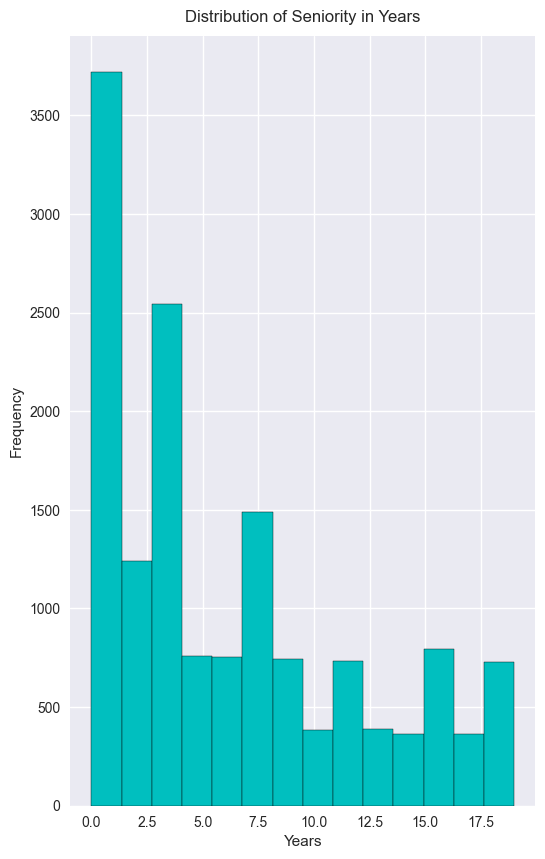

In [75]:
# Show histrogram of seniority 
plt.style.use('seaborn-v0_8')


plt.figure(figsize=(6,10))
plt.hist(df['years_experience'], bins=14, color='c', edgecolor='black')

# Add the title and labels
plt.title('Distribution of Seniority in Years',pad=10)
plt.xlabel('Years')
plt.ylabel('Frequency')

# Show the plot
plt.show()

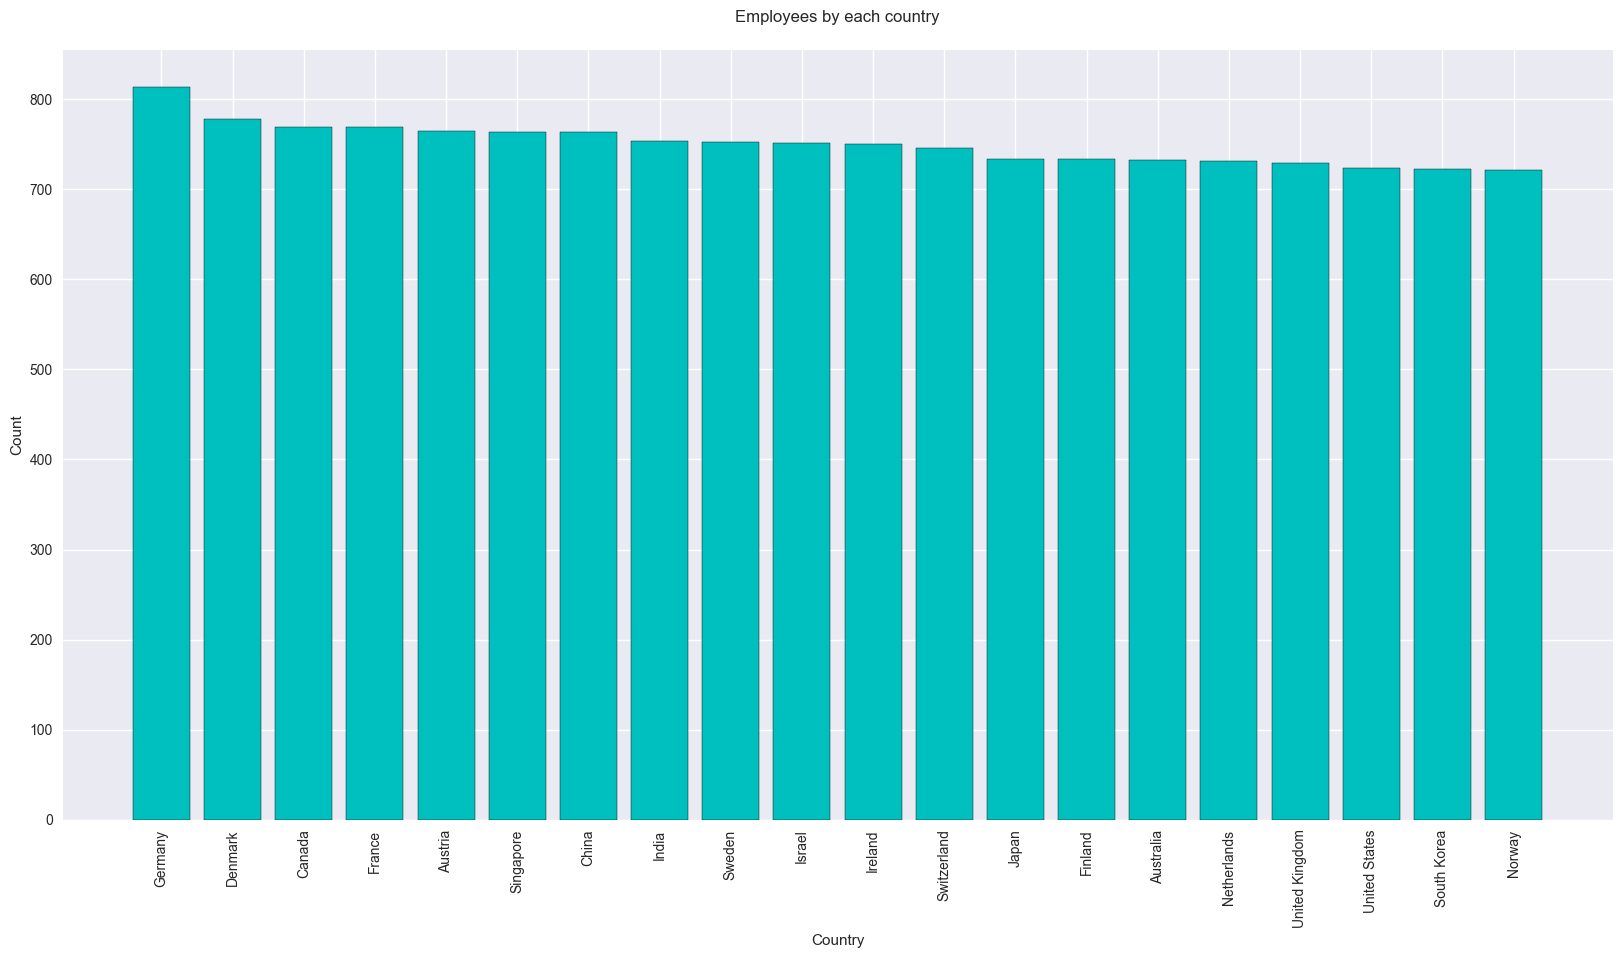

In [83]:
#Show bar chart that showing the distrubtion of workers by countries
mask = df.groupby('company_location')['job_id'].count().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
plt.bar(x=mask.index, height=mask.values,color='c', edgecolor='black') 
plt.xlabel("Country")
plt.xticks(rotation=90) 
plt.ylabel("Count")
plt.title('Employees by each country',pad=20)
plt.show()

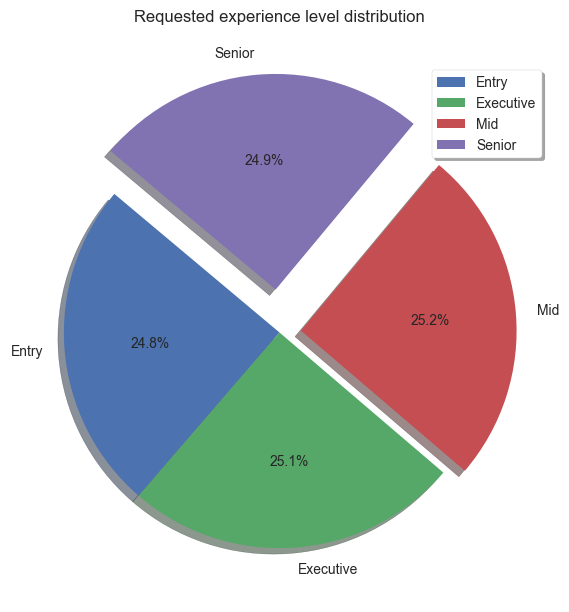

In [90]:
# Show Pie chart showing the distrbution  of the requested experience level by the employees
experience= df.groupby('experience_level')['job_id'].count()
plt.figure(figsize=(9,7))
plt.pie(experience,labels=experience.index, autopct="%1.1f%%",explode=(0,0,0.1,0.2),shadow=True, startangle=140)
plt.title("Requested experience level distribution",pad=30)
plt.legend(loc="upper right", shadow=True, frameon=True, facecolor="white")
plt.show()

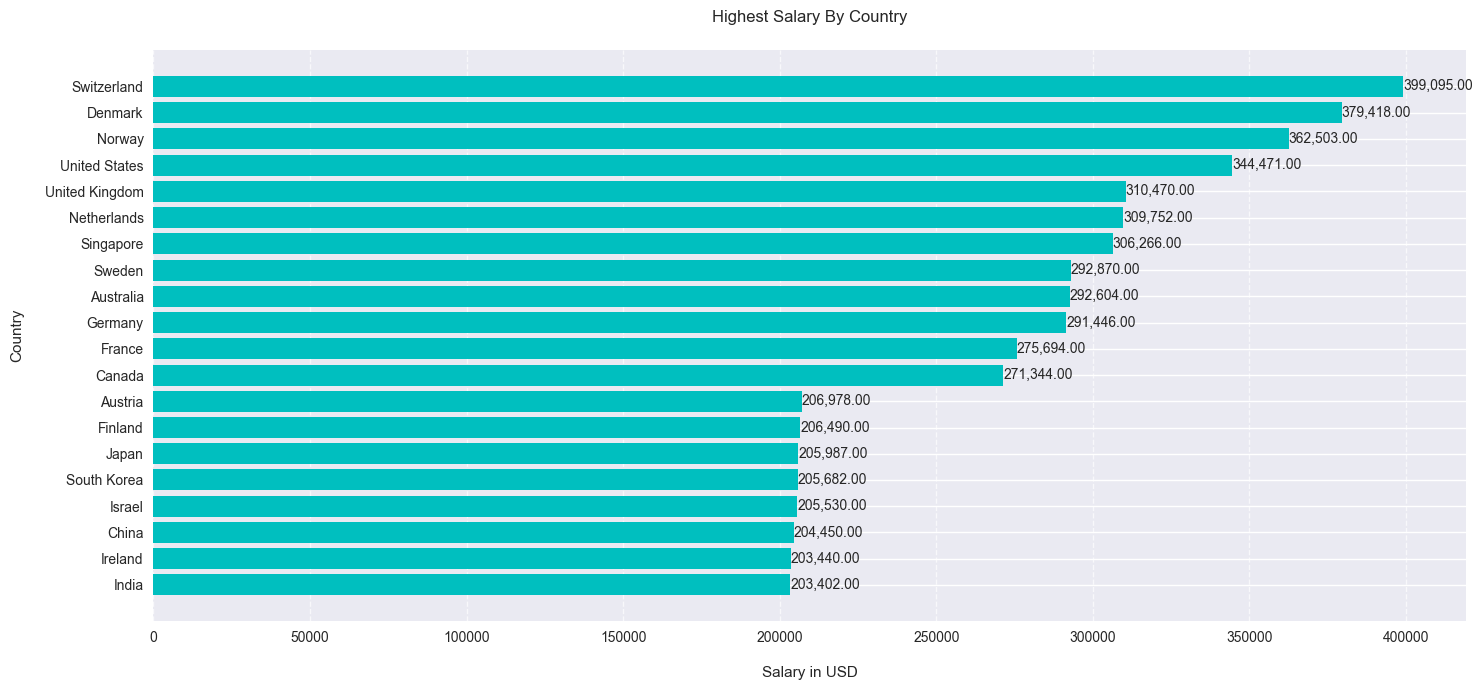

In [95]:
# Show the highest of salary by country, sorted descending
# max_salary=df.groupby('company_location').max('salary_usd')
# max_salary['salary_usd'].sort_values(ascending=False).to_frame()

# Group by and get the max salary per country, then sort descending
max_salary = df.groupby('company_location')['salary_usd'].max().sort_values()

# Plot
plt.figure(figsize=(15, 7))
bars = plt.barh(max_salary.index, max_salary.values, color='c')

# Add labels at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 5,  # x position (slightly offset from bar)
             bar.get_y() + bar.get_height() / 2,  # y position (centered)
             f'{bar.get_width():,.2f}',  # Format label (2 decimal places)
             va='center', fontsize=10)

plt.xlabel("Salary in USD", labelpad=15)
plt.ylabel("Country", labelpad=15)
plt.title("Highest Salary By Country", pad=20)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

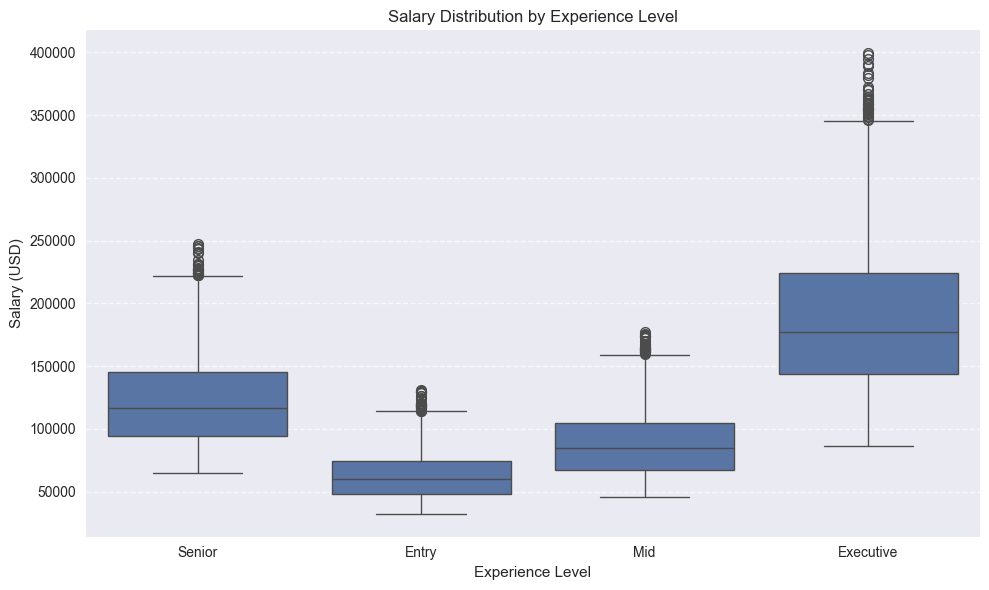

In [97]:
# Shows the distribution, median, and outliers of salaries across different experience levels.
plt.figure(figsize=(10, 6))
sb.boxplot(x='experience_level', y='salary_usd', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Experience Level')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


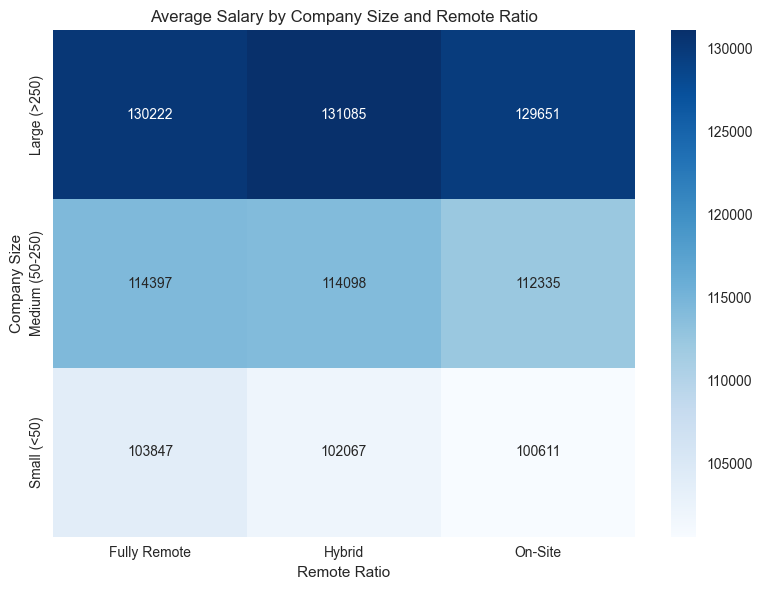

In [100]:
# Visualize the relationship between remote work and company size in terms of salary.
pivot = df.pivot_table(index='company_size', columns='remote_ratio', values='salary_usd', aggfunc='mean')

plt.figure(figsize=(8, 6))
sb.heatmap(pivot, annot=True, fmt=".0f", cmap='Blues')
plt.title('Average Salary by Company Size and Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Company Size')
plt.tight_layout()
plt.show()


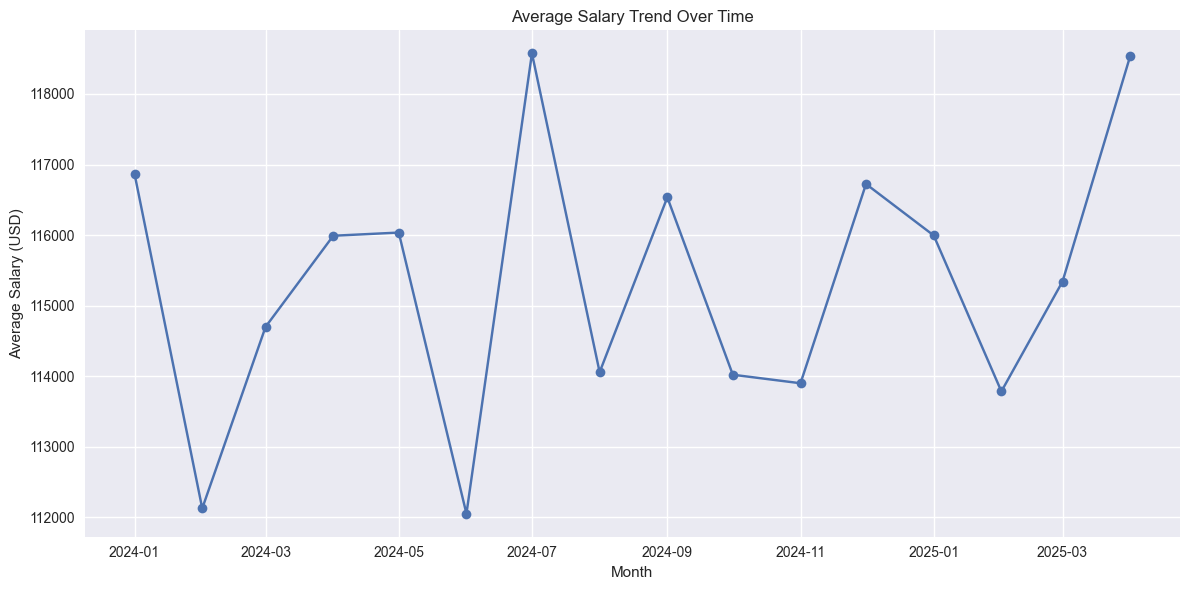

In [101]:
# Shows salary trends over time using the posting_date field.
df['posting_month'] = df['posting_date'].dt.to_period('M').dt.to_timestamp()
monthly_salary = df.groupby('posting_month')['salary_usd'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_salary.index, monthly_salary.values, marker='o')
plt.title('Average Salary Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


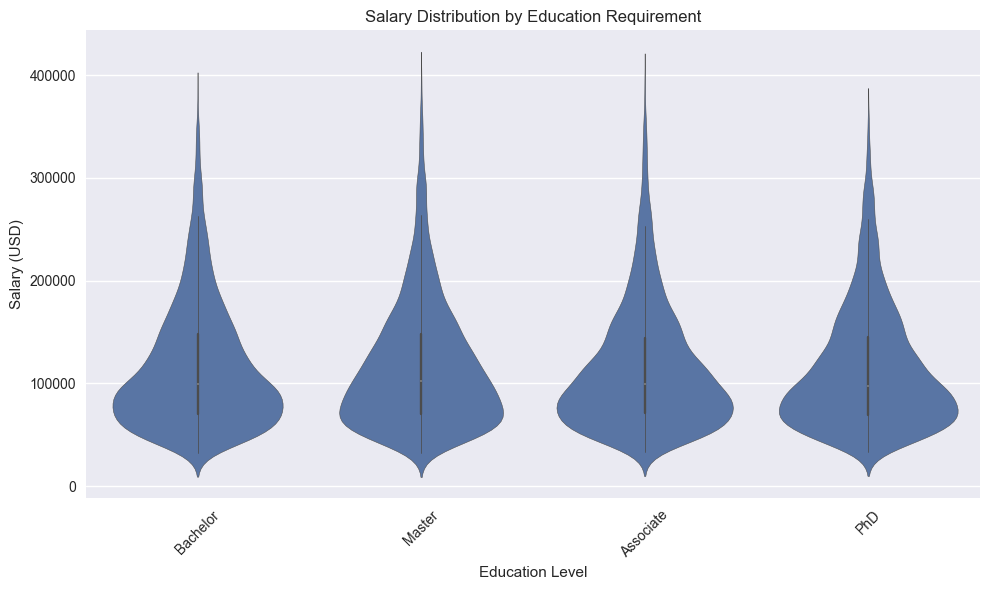

In [103]:
#  Show Combination of boxplot and KDE to show salary spread by education level.
plt.figure(figsize=(10, 6))
sb.violinplot(x='education_required', y='salary_usd', data=df)
plt.title('Salary Distribution by Education Requirement')
plt.xlabel('Education Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


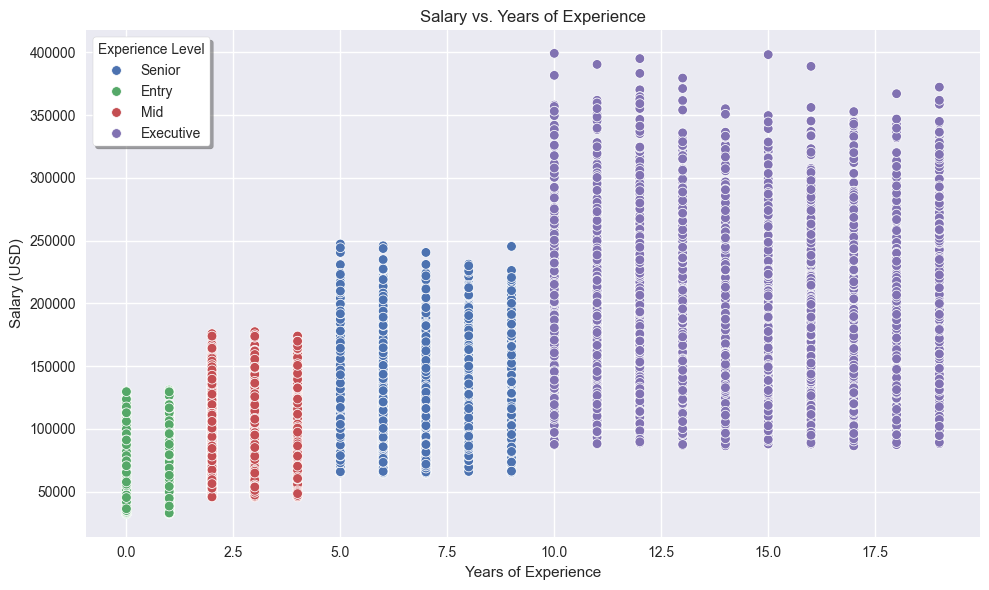

In [106]:
# Shows correlation between years of experience and salary. Useful to identify outliers or patterns.
plt.figure(figsize=(10, 6))
sb.scatterplot(x='years_experience', y='salary_usd', hue='experience_level', data=df)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend(loc="upper left", shadow=True, frameon=True, facecolor="white", title="Experience Level")
plt.tight_layout()
plt.show()


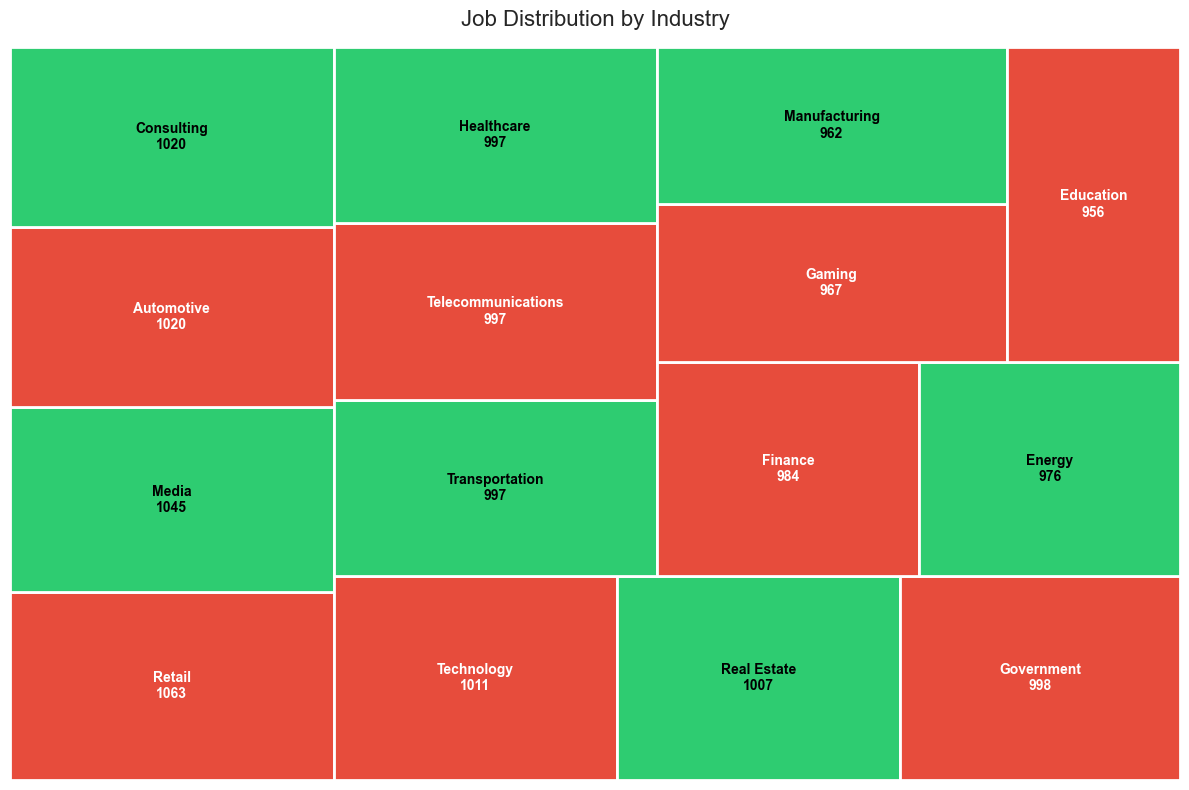

In [116]:
# Shows the number of jobs in each industry using a horizontal bar chart.
industry_counts = df['industry'].value_counts()
labels = [f"{industry}\n{count}" for industry, count in zip(industry_counts.index, industry_counts.values)]
colors = ['#e74c3c' if i % 2 == 0 else '#2ecc71' for i in range(len(industry_counts))]

# Calculate rectangles (x, y, dx, dy)
rects = squarify.normalize_sizes(industry_counts.values, 100, 100)
rects = squarify.squarify(rects, 0, 0, 100, 100)

fig, ax = plt.subplots(figsize=(12, 8))

for i, rect in enumerate(rects):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    ax.add_patch(
        plt.Rectangle(
            (x, y),
            dx,
            dy,
            facecolor=colors[i],
            edgecolor='white',  # Border color here
            linewidth=2
        )
    )
    # Add text in the middle of rectangle
    ax.text(
        x + dx / 2,
        y + dy / 2,
        labels[i],
        va='center',
        ha='center',
        fontsize=10,
        weight='bold',
        color='white' if i % 2 == 0 else 'black',
        wrap=True
    )

ax.axis('off')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.title('Job Distribution by Industry', fontsize=16, pad=15)
plt.tight_layout()
plt.show()


## Global AI Job Market Insights

1. Dataset Scope and Market Overview  
   - Dataset includes 15,000 entries with 19 data points each.  
   - Covers job titles, USD salaries, experience levels, employment types, company size and location, remote ratios, required skills, education, industry, and benefits scores.  
   - Enables comprehensive analysis of demand, compensation, and qualifications in the AI job market.

2. Compensation Landscape  
   - Average salary: 115,349 USD  
   - Salary range: 32,519 USD to 399,095 USD  
   - Highlights need for competitive salary strategies based on experience, location, and specialization.

3. Experience Level Demands  
   - Average required experience: 6.25 years  
   - Range: 0 to 19 years, covering entry-level to executive roles  
   - Indicates a balanced market and the importance of clear career development paths.

4. Job Posting Attributes and Benefits  
   - Average job description length: 1,503 characters  
   - Average benefits score: 7.5 (range: 5.0–10.0)  
   - Useful for optimizing job clarity and competitive benefit offerings.

5. Evolving Employment and Work Models  
   - Employment types: Full-Time, Part-Time, Contract, Freelance  
   - Work modes: On-Site, Hybrid, Fully Remote  
   - Reflects growing demand for flexible work arrangements.

6. Company Scale in AI Hiring  
   - Company sizes: Small (<50), Medium (50–250), Large (>250)  
   - Analysis supports strategy alignment by organization scale and structure.

7. Geographic Distribution of AI Opportunities  
   - Data includes company location and employee residence  
   - Supports tracking of global AI job distribution, talent migration, and localized recruitment.

8. Critical Skill Requirements  
   - In-demand skills examples:  
     - “Tableau, PyTorch, Kubernetes, Linux, NLP”  
     - “Deep Learning, AWS, Mathematics, Python, Docker”  
     - “MLOps, Java, Tableau, Python”  
   - Helps institutions and professionals align skills with market demand.
   - The top 5 most required skills are : Python, SQL , TensorFlow, Kuberenetes, Scala, PyTorch.

9. Educational Prerequisites for AI Roles  
   - Common qualifications: Bachelor, Master, Associate, PhD  
   - Assists in aligning education paths with job expectations.

10. Cross-Industry Adoption of AI Talent  
    - AI jobs span sectors like Automotive, Media, Education, Consulting, and more  
    - Reflects the widespread adoption of AI across industries.

11. Job Title Diversity and Specialization  
    - Roles include AI Research Scientist, AI Software Engineer, AI Specialist, NLP Engineer, AI Consultant  
    - Shows increasing specialization and diverse career paths.
